In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\User\Anaconda3\envs\dataScience1\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [2]:
#data is the variable name for the Pandas default data structure called
# a "Dataframe" in this case its a 2D Array
data = pd.read_csv('Demographic_Data.csv')

In [3]:
#data.head()
clean_data = data.drop_duplicates()

In [4]:
clean_data.to_csv(r'D_Data_Clean.csv', index=False)

In [5]:
data = pd.read_csv('D_Data_Clean.csv')

In [6]:
data.duplicated().sum()

0

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data)
digits.target

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([0, 1, 2, ..., 8, 9, 8])

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 5 columns):
in-store    79979 non-null int64
age         79979 non-null int64
items       79979 non-null int64
amount      79979 non-null float64
region      79979 non-null int64
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [9]:
#Define bins for age ranges 18-29 (young), 29-59 (middle aged), 59-85 (older)
bins = [18, 29, 59, 85]

In [10]:
group_names = ['Young', 'Middle', 'Older']

In [11]:
data['age_bins'] = pd.cut(data['age'], bins, labels=group_names)

In [12]:
data

,in-store,age,items,amount,region,age_bins
0,0,37,4,281.03,2,Middle
1,0,35,2,219.51,2,Middle
2,1,45,3,1525.70,4,Middle
3,1,46,3,715.25,3,Middle
4,1,33,4,1937.50,1,Middle
...,...,...,...,...,...,...
79974,1,71,3,558.82,1,Older
79975,0,59,7,1932.00,3,Middle
79976,0,54,1,414.16,2,Middle
79977,1,49,4,335.32,1,Middle


In [13]:
#drop rows of customers under 60 and put into a new dataframe
df2 = data.drop(index=data[data['age_bins'] == 'Middle'].index)
data_older = df2.drop(index=df2[df2['age_bins'] == 'Young'].index)
older_online = data_older.drop(index=data_older[data_older['in-store'] == 1].index)

In [14]:
old_sum = older_online['amount'].sum()
print('Online Customers 60+ spent: $','%.2f'%old_sum)

Online Customers 60+ spent: $ 5004192.13


In [15]:
#show new dataframe
data_older

,in-store,age,items,amount,region,age_bins
7,1,66,5,819.9800,3,Older
32,1,74,6,652.5700,3,Older
36,1,66,6,429.1300,3,Older
51,0,74,3,473.6200,2,Older
59,0,66,1,65.6190,2,Older
...,...,...,...,...,...,...
79956,0,61,7,251.4200,2,Older
79968,0,69,1,404.4200,2,Older
79969,0,71,7,6.9172,2,Older
79971,0,77,4,170.0200,2,Older


In [16]:
#drop rows of customers under 30 and put into a new dataframe
df3 = data.drop(index=data[data['age_bins'] == 'Middle'].index)
data_young = df3.drop(index=df3[df3['age_bins'] == 'Older'].index)
older_online = data_older.drop(index=data_older[data_older['in-store'] == 1].index)
young_online = data_young.drop(index=data_young[data_young['in-store'] == 1].index)
temp2 = data_older['amount'].sum() 

In [17]:
young_online['amount']

5        1314.200
29        623.050
39        261.100
46        592.340
78         39.771
           ...   
79948    2906.400
79958     428.840
79963    1672.700
79964     491.770
79973     698.540
Name: amount, Length: 5610, dtype: float64

In [18]:

temp = 0
for index in range(len(older_online)):
    temp += older_online['items'].iloc[index]
    
temp2 = 0
for index in range(len(young_online)):
    temp2 += young_online['items'].iloc[index]
    
        
print('older group online items bought: ',temp)
print('younger group online items bought: ',temp2)

older group online items bought:  48895
younger group online items bought:  25394


In [19]:
young_sum = young_online['amount'].sum()
older_sum = older_online['amount'].sum()

temp2 = data_older['amount'].sum()
temp = data_young['amount'].sum()

olderInstore = temp2 - older_sum
youngInstore = temp - young_sum

In [20]:
older_online

,in-store,age,items,amount,region,age_bins
51,0,74,3,473.6200,2,Older
59,0,66,1,65.6190,2,Older
64,0,69,4,213.6200,2,Older
65,0,81,4,324.9800,2,Older
67,0,65,2,204.6700,2,Older
...,...,...,...,...,...,...
79952,0,76,1,62.3100,2,Older
79956,0,61,7,251.4200,2,Older
79968,0,69,1,404.4200,2,Older
79969,0,71,7,6.9172,2,Older


In [21]:
#Sum total of online customers based on the age ranges 60-85 and 18-30
older_online = (data_older['in-store'] == 0)
young_online = (data_young['in-store'] == 0)
older_instore = (data_older['in-store'] == 1)
young_instore = (data_young['in-store'] == 1)

print('Older Instore Customers: ', older_instore.sum())
print('Young Instore Customers: ', young_instore.sum())
print('')

print('Older Online Customers: ', older_online.sum())
print('Young Online Customers: ', young_online.sum())
print('')
print('Amount In-store Older: $', end="")
print('%.2f'%olderInstore)
print('Amount Online Older: $', end="")
print('%.2f'%old_sum)
print('')
print('Amount In-store Young: $', end="")
print('%.2f' %youngInstore)
print('Amount Online Young: $', end="")
print('%.2f'%young_sum)
print('Customers under 30 spent $', '%.2f'%(young_sum - old_sum), ' more than older customers online')
print('Customers under 30 spent $', '%.2f'%(youngInstore - olderInstore), ' more than older customers in-store')

Older Instore Customers:  5687
Young Instore Customers:  8027

Older Online Customers:  10786
Young Online Customers:  5610

Amount In-store Older: $2952619.67
Amount Online Older: $5004192.13

Amount In-store Young: $7140473.06
Amount Online Young: $7993186.83
Customers under 30 spent $ 2988994.70  more than older customers online
Customers under 30 spent $ 4187853.39  more than older customers in-store


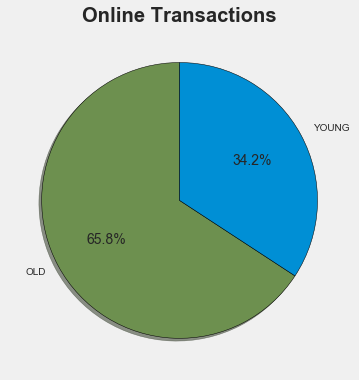

In [22]:
import pylab
plt.style.use("fivethirtyeight")

plt.title("Online Transactions",fontweight="bold")

slices = [older_online.sum(), young_online.sum()]
colors = ['#6d904f', '#008fd5']
labels = ['OLD', 'YOUNG']
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, shadow=True, 
        startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})

plt.tight_layout()

pylab.savefig('online_trans.png')

plt.show()

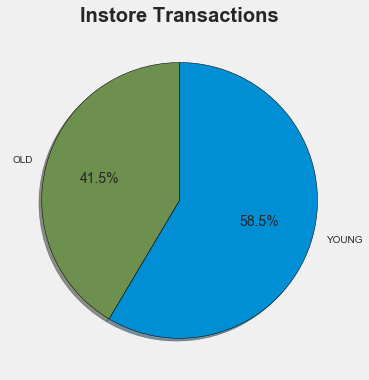

In [23]:
import pylab
plt.style.use("fivethirtyeight")

plt.title("Instore Transactions",fontweight="bold")

slices = [older_instore.sum(), young_instore.sum()]
colors = ['#6d904f', '#008fd5']
labels = ['OLD', 'YOUNG']
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, shadow=True, 
        startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})

plt.tight_layout()

pylab.savefig('instore_trans.png')

plt.show()

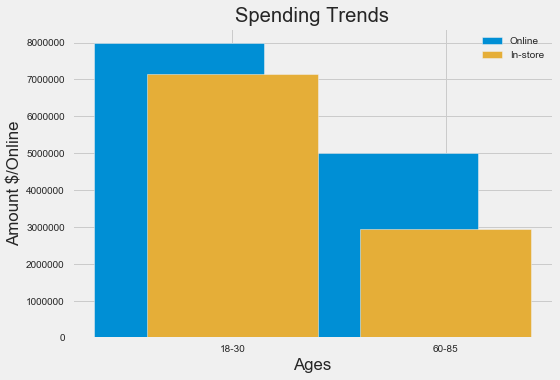

In [24]:
plt.style.use("fivethirtyeight")

plt.tight_layout()
ages_x = ["18-30", "60-85"]

x_indexes = np.arange(len(ages_x))
width = 0.25

amt_online_y = [young_sum, old_sum]
amt_instore_y =[ youngInstore,olderInstore]
plt.bar(x_indexes - width, amt_online_y, color="#008fd5", label="Online")
plt.bar(x_indexes, amt_instore_y, color="#e5ae38", label="In-store")

plt.legend()
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.title("Spending Trends")
plt.xlabel("Ages")
plt.ylabel("Amount $/Online")
plt.tight_layout()
pylab.savefig('spending_trends.png')
plt.savefig('foo.png')

In [25]:

X = data.iloc[: , 1:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,items,amount
0,37,4,281.03
1,35,2,219.51
2,45,3,1525.70
3,46,3,715.25
4,33,4,1937.50


In [26]:
features = ["in-store", "region", "items", "amount"]

In [27]:
y = data['in-store']
#region1 = (older_online['region'] == 1)
#region1.sum()
# iloc[sr:ed, sc:ed]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [29]:
X_train.head()

,age,items,amount
65254,46,2,1912.70
11430,60,7,231.78
46451,41,7,1692.70
20822,41,8,390.01
52818,26,5,2399.80


In [30]:
y_train

65254    1
11430    0
46451    0
20822    0
52818    0
        ..
63206    1
61404    1
17730    1
28030    1
15725    0
Name: in-store, Length: 55985, dtype: int64

In [31]:
from sklearn.model_selection import cross_val_score


In [32]:
algos_Class = []
#algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [33]:
#instanciate 
#algo = RandomForestClassifier()

In [34]:
#information for the group to build the model
#model = algo.fit(X_train, y_train)

In [35]:
#compare preds to ground truth (y_test - known values)

In [36]:
#classification
results = []
names = []
for name, model in algos_Class:
     result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
     names.append(name)
     results.append(result)

In [37]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.6529964316166254


In [38]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=4)
model = algo.fit(X_train,y_train)

In [39]:
print(cross_val_score(model, X, y, cv=3))

[0.70712678 0.71856714 0.70996662]


In [40]:
#Predictions
preds = model.predict(X_test)

In [41]:
accuracy_score(y_test, preds)

0.7230974410269234

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     11874
           1       0.74      0.70      0.72     12120

    accuracy                           0.72     23994
   macro avg       0.72      0.72      0.72     23994
weighted avg       0.72      0.72      0.72     23994



In [43]:
region_values = ['0','1']

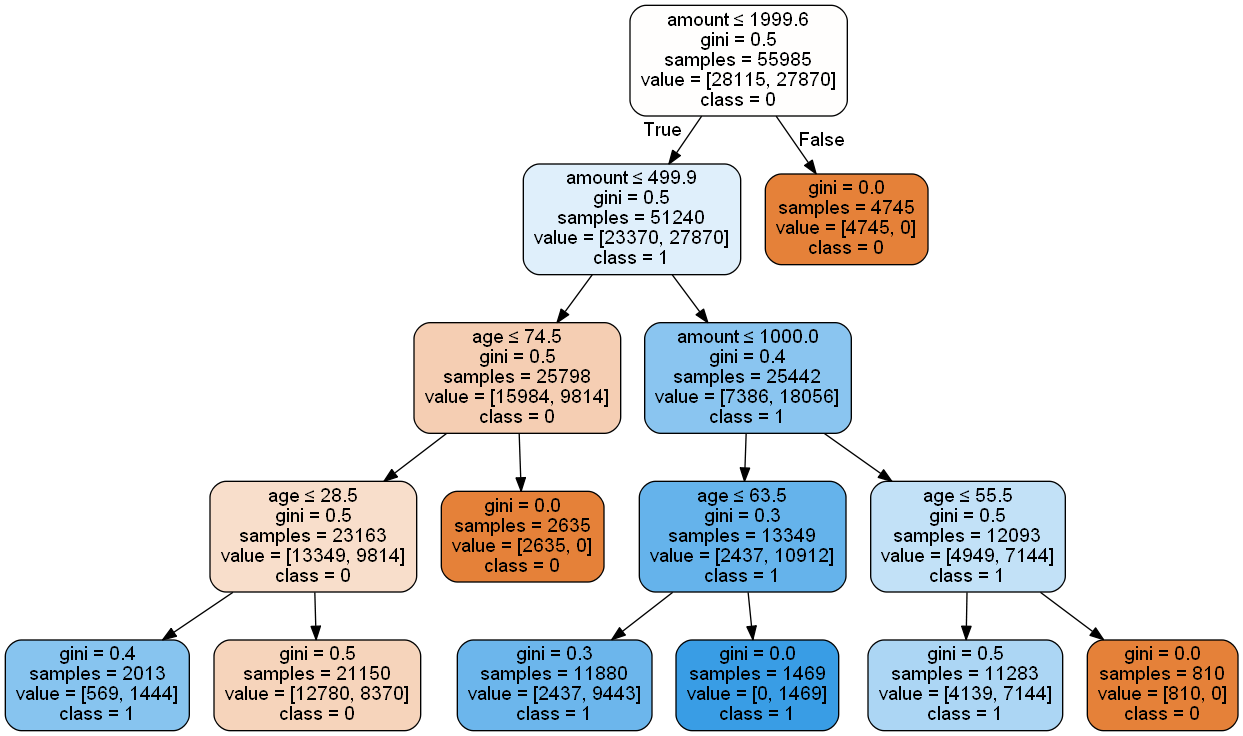

In [44]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=region_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('in_store_tree.png')
Image(graph.create_png())